## اضافه کردن کتابخانه‌های مورد نیاز

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

## خواندن داده

In [2]:
data = pd.read_csv('wbc.csv',index_col='id')

### جدا کردن ورودی و خروجی مدل

In [3]:
y = data['diagnosis'].map({'B':0,'M':1})

In [4]:
X = data.drop(columns='diagnosis')

### جداسازی داده‌ی آموزش و آزمون
- برای اینکه نتایج برای همه یکسان باشد، `random_state` برای همه برابر عددی ثابت قرار داده شده است.

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.2,
                                                stratify = y,
                                                random_state = 1)

### لود کردن یک مدل جنگل تصادفی
- `n_estimators` تعداد درخت‌های ساخته شده است.
- `min_samples_leaf` نشان دهنده حداقل کسر داده‌ی موجود در یک برگ از درخت است.
- برای اینکه نتایج برای همه یکسان باشد، `random_state` برای همه برابر عددی ثابت قرار داده شده است.

In [6]:
rf = RandomForestClassifier(n_estimators = 500,
               min_samples_leaf = 0.13,
                           random_state = 1)

### برازش مدل روی داده‌های آموزشی

In [7]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.13, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### گرفتن پیش‌بینی مدل برای ورودی‌های آزمون

In [8]:
y_pred_rf = rf.predict(X_test)

### اندازه‌گیری دقت مدل روی داده‌های آزمون

In [9]:
acc_rf = accuracy_score(y_test,y_pred_rf)
acc_rf

0.9473684210526315

### میزان اهمیت ویژگی‌های مختلف
میزان اهمیت ویژگی‌های مختلف که در `rf.feature_importances_` وجود دارد به همراه اسم ستون‌های متناظر با آنها در یک سری پانداس می‌ریزیم

In [10]:
importances_rf = pd.Series(rf.feature_importances_,
                          index = X.columns)

In [11]:
sorted_importances_rf = importances_rf.sort_values()

### کشیدن نمودار مربوط به اهمیت ویژگی‌ها
برای این منظور نمودار میله‌ای مناسب است.

Text(0.5, 1.0, 'Feature Importance')

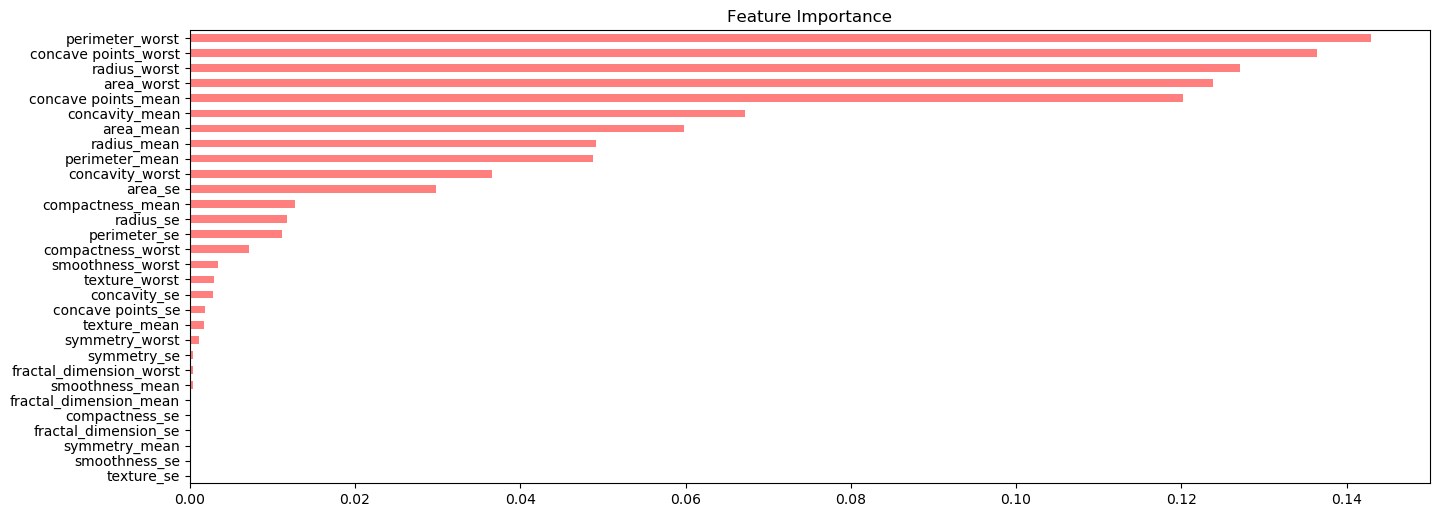

In [12]:
plt.figure(figsize = (16,6),dpi = 100)
sorted_importances_rf.plot(kind = 'barh',
                        color = 'red',alpha = 0.5)
plt.title("Feature Importance")